## Purchase Pattern Analytics:
### Problem Statement:

In the context of a retail environment, the challenge is to leverage Market Basket Analysis (MBA) on a Transaction dataset to unveil relationships between products. By conducting exploratory data analysis, addressing data quality issues, employing data visualization techniques, and implementing the Apriori algorithm, the objective is to extract valuable insights. This includes understanding customer purchasing behavior, identifying frequently co-occurring products, and deriving actionable recommendations to enhance sales strategies and customer satisfaction.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
data = pd.read_excel('Client Project.xlsx')
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day_of_week,Time_of_day,Revenue
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,Dec,Wed,Morning,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,Dec,Wed,Morning,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,Dec,Fri,Afternoon,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,Dec,Fri,Afternoon,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,Dec,Fri,Afternoon,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,Dec,Fri,Afternoon,16.60


### Display first few rows

In [3]:
data.shape

(522064, 12)

In [4]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day_of_week,Time_of_day,Revenue
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,Dec,Wed,Morning,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,Dec,Wed,Morning,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34


### Data Cleaning & Preparation

#### Remove missing values in 'Itemname'


In [5]:
data = data[data["Itemname"].notna()]
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day_of_week,Time_of_day,Revenue
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,Dec,Wed,Morning,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,Dec,Wed,Morning,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,Dec,Fri,Afternoon,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,Dec,Fri,Afternoon,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,Dec,Fri,Afternoon,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,Dec,Fri,Afternoon,16.60


### Convert columns to appropriate types

In [6]:
data["Itemname"] = data["Itemname"].astype(str)
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y %H:%M")

In [7]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day_of_week,Time_of_day,Revenue
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,Dec,Wed,Morning,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,Dec,Wed,Morning,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Dec,Wed,Morning,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,Dec,Fri,Afternoon,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,Dec,Fri,Afternoon,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,Dec,Fri,Afternoon,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,Dec,Fri,Afternoon,16.60


### Extract useful time-based features

In [8]:
data["YearMonth"] = data["Date"].dt.to_period("M")
data["Week"] = data["Date"].dt.strftime("%W")
data["Day"] = data["Date"].dt.strftime("%d")
data["Weekday"] = data["Date"].dt.strftime("%A")
data["Hour"] = data["Date"].dt.hour

### Remove negative prices and quantities

In [9]:
data = data[(data["Quantity"] > 0) & (data["Price"] > 0)]

### Display cleaned dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519551 entries, 0 to 522063
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   BillNo       519551 non-null  object        
 1   Itemname     519551 non-null  object        
 2   Quantity     519551 non-null  int64         
 3   Date         519551 non-null  datetime64[ns]
 4   Price        519551 non-null  float64       
 5   CustomerID   387985 non-null  float64       
 6   Country      519551 non-null  object        
 7   Year         519551 non-null  int64         
 8   Month        519551 non-null  object        
 9   Day_of_week  519551 non-null  object        
 10  Time_of_day  519551 non-null  object        
 11  Revenue      519551 non-null  float64       
 12  YearMonth    519551 non-null  period[M]     
 13  Week         519551 non-null  object        
 14  Day          519551 non-null  object        
 15  Weekday      519551 non-null  obje

## Exploratory Data Analysis (EDA) & Visualization

Exploratory Data Analysis (EDA) was conducted to understand the structure, quality, and patterns within the dataset. First, data cleaning was performed by handling missing values, filtering out incomplete records, and ensuring consistency in product names. Summary statistics provided insights into transaction volume, unique items, and customer purchase behavior. Visualizations, such as histograms and bar charts, revealed the most frequently purchased products, seasonal trends, and variations in purchase frequency across different periods.

Further, correlation analysis and item frequency distribution helped in identifying high-selling products and potential product associations. The Apriori algorithm was then applied to extract meaningful relationships between products, using metrics like support, confidence, and lift. These findings enable businesses to optimize stock management, design better promotional campaigns, and improve customer experience through personalized recommendations.

### Check Missing Values & Duplicate


In [11]:
print("Missing Values:\n", data.isnull().sum())
print("Duplicate Entries:", data.duplicated().sum())

Missing Values:
 BillNo              0
Itemname            0
Quantity            0
Date                0
Price               0
CustomerID     131566
Country             0
Year                0
Month               0
Day_of_week         0
Time_of_day         0
Revenue             0
YearMonth           0
Week                0
Day                 0
Weekday             0
Hour                0
dtype: int64
Duplicate Entries: 5281


In [12]:
data.describe()

,Quantity,Price,CustomerID,Year,Revenue,Hour
count,519551.000000,519551.000000,387985.000000,519551.000000,519551.000000,519551.000000
mean,10.398361,3.887894,15317.042994,2010.921143,19.828458,13.100704
std,157.004952,35.954045,1721.813298,0.269515,272.860193,2.430734
min,1.000000,0.001000,12346.000000,2010.000000,0.001000,6.000000
25%,1.000000,1.250000,13950.000000,2011.000000,3.750000,11.000000
50%,3.000000,2.080000,15265.000000,2011.000000,9.870000,13.000000
75%,10.000000,4.130000,16837.000000,2011.000000,17.400000,15.000000
max,80995.000000,13541.330000,18287.000000,2011.000000,168469.600000,20.000000


### Top 10 Most Purchased Products

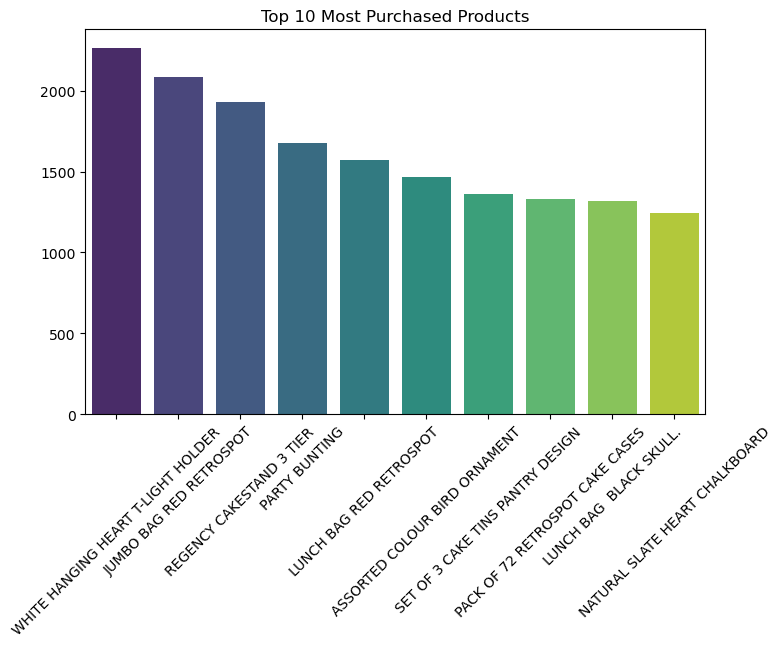

In [13]:
plt.figure(figsize=(8, 5))
top_products = data["Itemname"].value_counts().head(10)
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top 10 Most Purchased Products")
plt.xticks(rotation=45)
plt.show()

### Top 10 Customers By Purshase

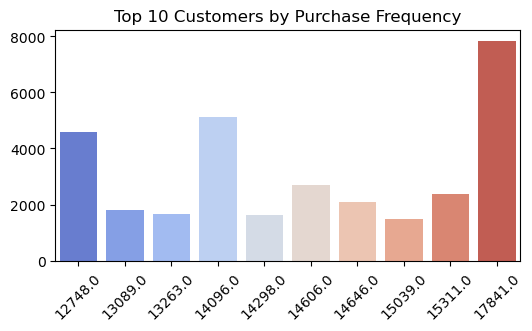

In [37]:
top_customers = data['CustomerID'].value_counts().head(10)
plt.figure(figsize=(6,3))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')
plt.title('Top 10 Customers by Purchase Frequency')
plt.xticks(rotation=45)
plt.show()

### Sales Over Time (Daily Trend)

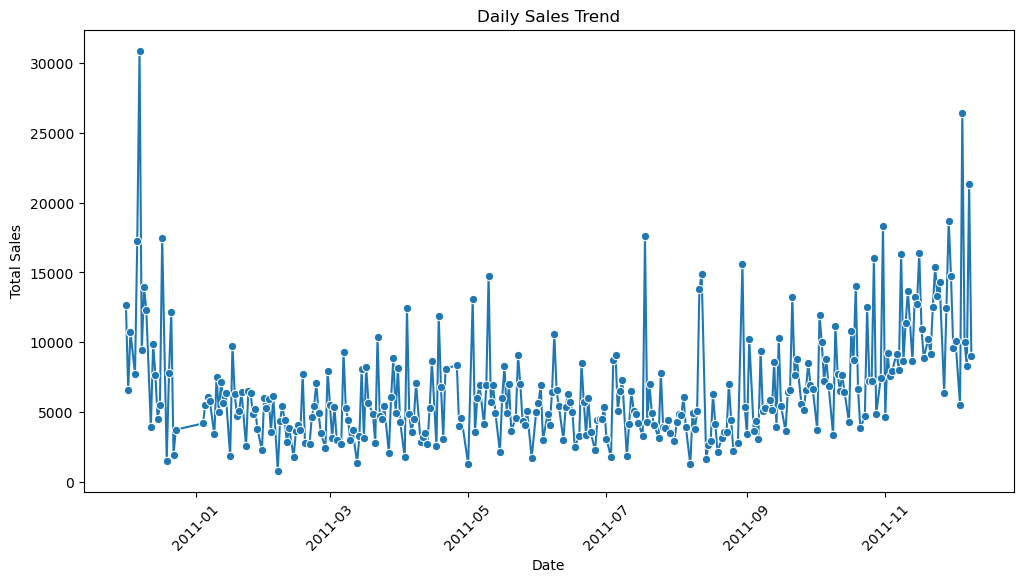

In [14]:
daily_sales = data.groupby(data["Date"].dt.date)["Price"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### Sales Frequency By Year

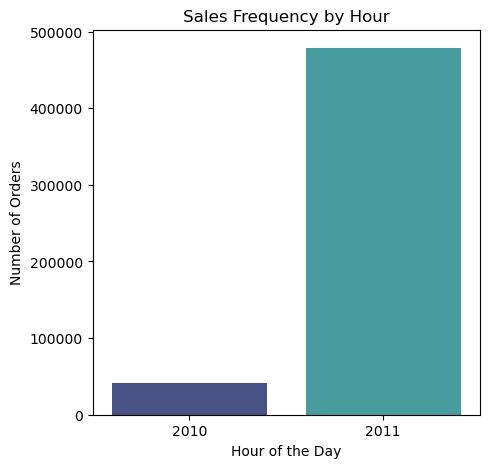

In [44]:
plt.figure(figsize=(5, 5))
yearly_sales = data.groupby("Year")["BillNo"].count()
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="mako")
plt.title("Sales Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.show()


### Sales Frequency By Time of Day


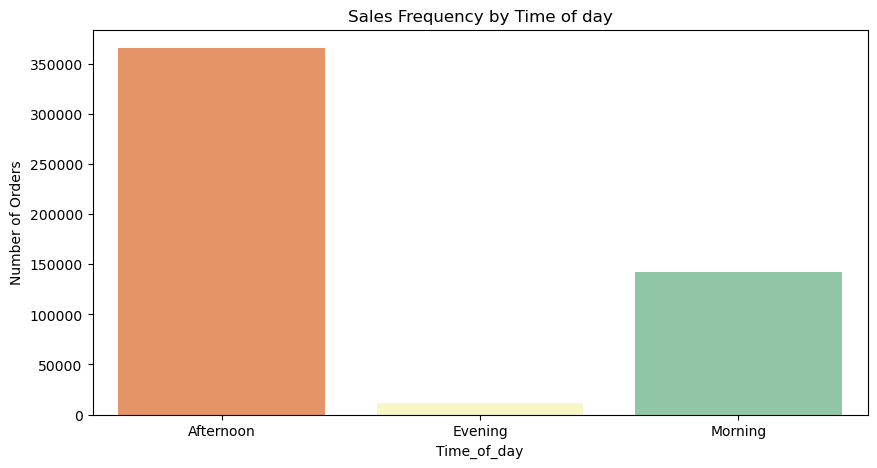

In [49]:
plt.figure(figsize=(10, 5))
timeofday_sales = data.groupby("Time_of_day")["BillNo"].count()
sns.barplot(x=timeofday_sales.index, y=timeofday_sales.values, palette="Spectral")
plt.title("Sales Frequency by Time of day")
plt.xlabel("Time_of_day")
plt.ylabel("Number of Orders")
plt.show()

### Sales Frequency by Hour

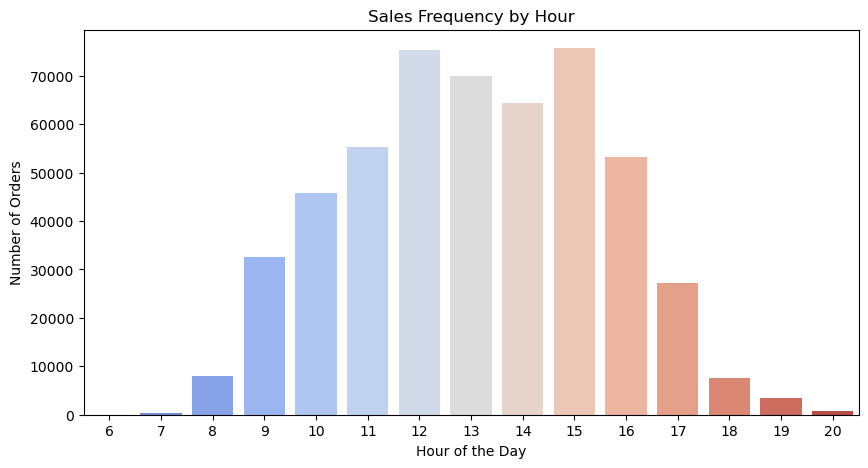

In [15]:
plt.figure(figsize=(10, 5))
hourly_sales = data.groupby("Hour")["BillNo"].count()
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="coolwarm")
plt.title("Sales Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.show()


### Sales Frequency By Day

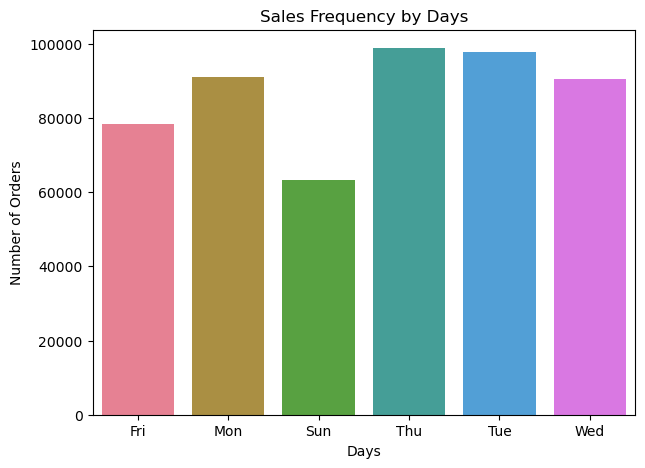

In [46]:
plt.figure(figsize=(7, 5))
Day_of_week_sales = data.groupby("Day_of_week")["BillNo"].count()
sns.barplot(x=Day_of_week_sales.index, y=Day_of_week_sales.values, palette="husl")
plt.title("Sales Frequency by Days")
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.show()


### Sales Frequency By Month

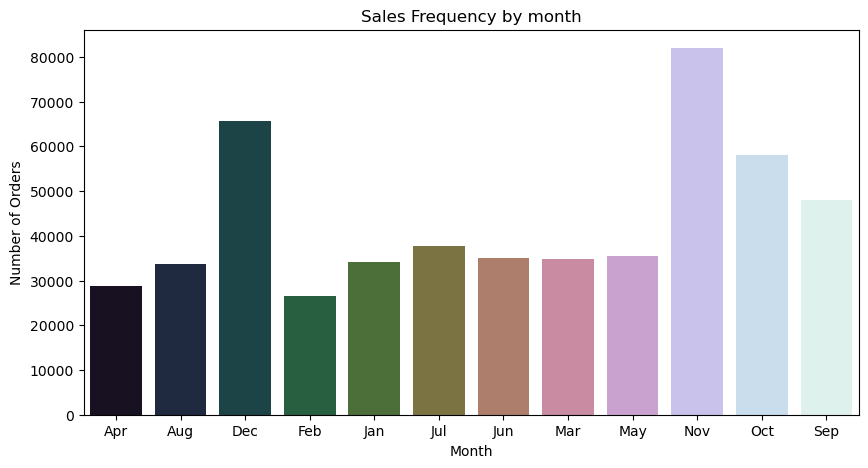

In [47]:
plt.figure(figsize=(10, 5))
monthly_sales = data.groupby("Month")["BillNo"].count()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="cubehelix")
plt.title("Sales Frequency by month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


### Heatmap of Sales by Weekday & Hour

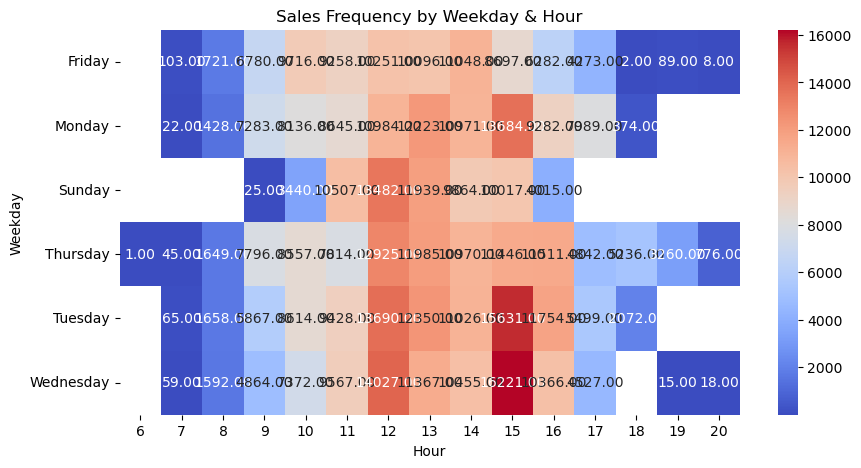

In [16]:
heatmap_data = data.groupby(["Weekday", "Hour"])["BillNo"].count().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Sales Frequency by Weekday & Hour")
plt.show()


###  Boxplot of Prices

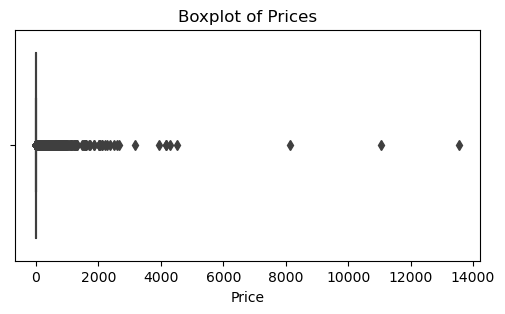

In [17]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data["Price"])
plt.title("Boxplot of Prices")
plt.show()


## Market Basket Analysis (Apriori Algorithm)

### Convert Data to Basket Format

In [18]:
basket = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)  # Convert to binary format

#### Remove transactions with all zeros (no purchases)

In [19]:
basket = basket.loc[basket.sum(axis=1) > 0]

### Apply Apriori Algorithm

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
if frequent_itemsets.empty:
    print(" No frequent itemsets found! Try lowering min_support.")

In [22]:
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Convert antecedents and consequents to strings for visualization
    rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ", ".join(list(x)))
    rules["consequents_str"] = rules["consequents"].apply(lambda x: ", ".join(list(x)))

    # Convert 'lift' to numeric to avoid errors
    rules["lift"] = pd.to_numeric(rules["lift"], errors="coerce")
    rules = rules.dropna(subset=["lift"])
    
    print("Market Basket Analysis Completed!")
else:
    print("No association rules generated. Adjust parameters.")

Market Basket Analysis Completed!


In [23]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Association Rules Preview:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Association Rules Preview:
                         antecedents                        consequents  \
0      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
1  (PACK OF 72 RETROSPOT CAKE CASES)      (60 TEATIME FAIRY CAKE CASES)   
2       (ALARM CLOCK BAKELIKE GREEN)        (ALARM CLOCK BAKELIKE PINK)   
3        (ALARM CLOCK BAKELIKE PINK)       (ALARM CLOCK BAKELIKE GREEN)   
4       (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED)   

    support  confidence       lift  
0  0.022240    0.545113   8.336091  
1  0.022240    0.340109   8.336091  
2  0.021013    0.425026  10.952675  
3  0.021013    0.541502  10.952675  
4  0.032364    0.654602  12.466755  


In [24]:
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

### Visualizing Top 10 Rules by Lift

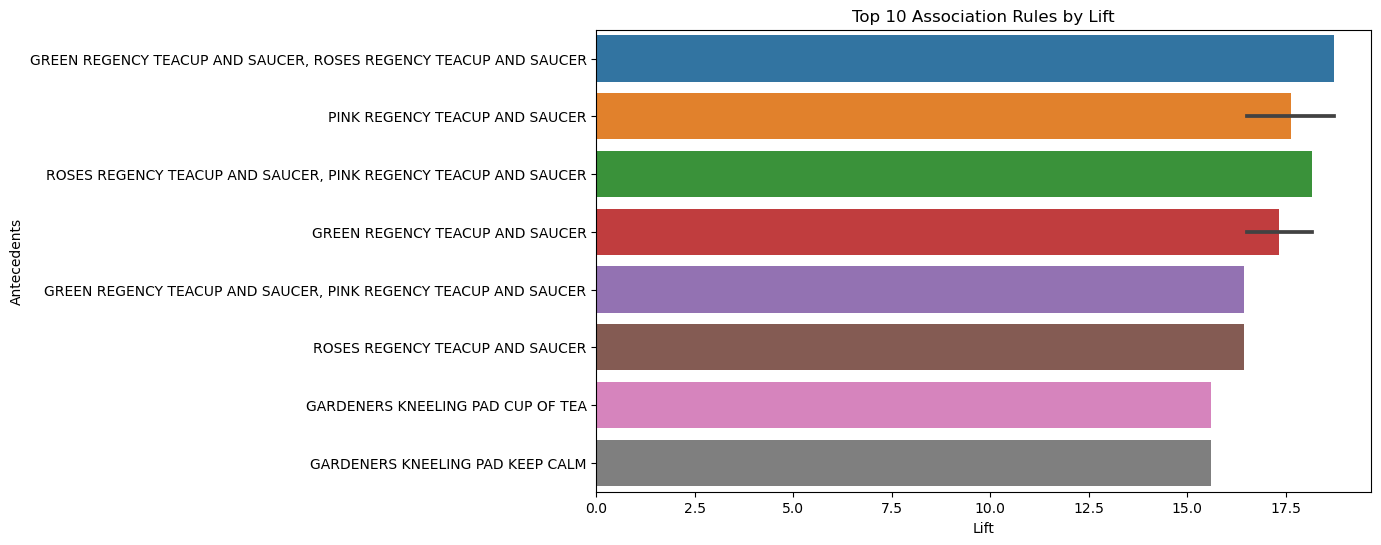

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents_str', data=rules.nlargest(10, 'lift'))
plt.xlabel("Lift")
plt.ylabel("Antecedents")
plt.title("Top 10 Association Rules by Lift")
plt.show()

### Export Results

In [26]:
frequent_itemsets.to_csv("Frequent_Itemsets.csv", index=False)
rules.to_csv("Association_Rules.csv", index=False)
print(" Analysis Complete! Files saved as 'Frequent_Itemsets.csv' and 'Association_Rules.csv'")

 Analysis Complete! Files saved as 'Frequent_Itemsets.csv' and 'Association_Rules.csv'
